In [99]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *


### Get New lists of hexagons, sorted by X_Coords, Y_coords or Z_coords

To do this, we use the function `create_hex_list_along_cube_coords` which is defined in hex_trees.
THe idea is to have upto three different lists. xc, yc and zc.
(In the background this uses a Tree structure to keep adding nodes according to their cube coord values.)

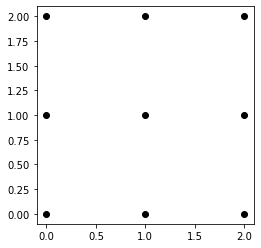

In [19]:
xx, yy = np.meshgrid([0,1,2], [0,1,2])
plt.plot(xx, yy, 'ko')
plt.axis('scaled');

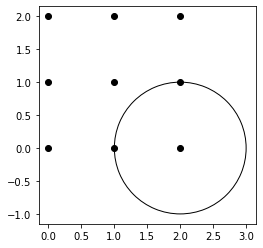

In [21]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid([0,1,2], [0,1,2])
plt.plot(xx, yy, 'ko')

center = (2,0)


ar = Arc(center, 2, 2)
ax.add_patch(ar)

plt.axis('scaled');

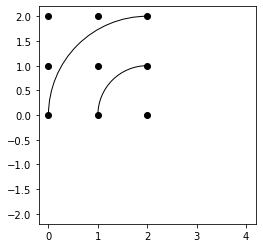

In [29]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid([0,1,2], [0,1,2])
plt.plot(xx, yy, 'ko')

center = (2,0)


ar = Arc(center, 4, 4, theta1=90, theta2=180)
ax.add_patch(ar)
ar2 = Arc((2,0), 2, 2, theta1=90, theta2=180)
ax.add_patch(ar2)

plt.axis('scaled');

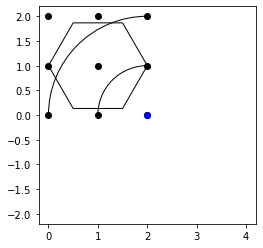

In [32]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid([0,1,2], [0,1,2])
plt.plot(xx, yy, 'ko')

h = Hex(1,1,1)
h.render(fill=None)

center = (2,0)

plt.plot(2, 0, 'bo')


ar = Arc(center, 4, 4, theta1=90, theta2=180)
ax.add_patch(ar)
ar2 = Arc((2,0), 2, 2, theta1=90, theta2=180)
ax.add_patch(ar2)

plt.axis('scaled');

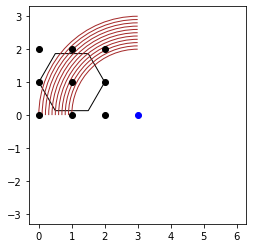

In [39]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid([0,1,2], [0,1,2])
plt.plot(xx, yy, 'ko')

h = Hex(1,1,1)
h.render(fill=None)

center = (3,0)

plt.plot(3, 0, 'bo')


for step in np.linspace(0,1,11):
    radius = 4 + step*2
    ar = Arc(center, radius, radius, theta1=90, theta2=180, color='brown')
    ax.add_patch(ar)

plt.axis('scaled');
#plt.axis('equal');

### Two more steps left

THese are bit trickier.
1. Find the 2 POINTs (p1, p2) at which a given circle and the line segment between two vertices intersects
2. Find the Angle that the line (p1, c) makes with the horizontal.

Now plot the arc

## Compute intersection point between a Line (edge of hexagon) and the Circle

In [5]:
#Has been copied to plot_functions.py
def slope(xy1, xy2):
    x1, y1 = xy1
    x2, y2 = xy2
    return (y2-y1)/(x2-x1)

def degree_slope(xy1, xy2):
    x1, y1 = xy1
    x2, y2 = xy2
    angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
    return(angle)

In [4]:
def circle_line_segment_intersection(circle_center, circle_radius, pt1, pt2, full_line=True, tangent_tol=1e-9):
    """ Find the points at which a circle intersects a line-segment.  This can happen at 0, 1, or 2 points.

    :param circle_center: The (x, y) location of the circle center
    :param circle_radius: The radius of the circle
    :param pt1: The (x, y) location of the first point of the segment
    :param pt2: The (x, y) location of the second point of the segment
    :param full_line: True to find intersections along full line - not just in the segment.  False will just return intersections within the segment.
    :param tangent_tol: Numerical tolerance at which we decide the intersections are close enough to consider it a tangent
    :return Sequence[Tuple[float, float]]: A list of length 0, 1, or 2, where each element is a point at which the circle intercepts a line segment.

    Note: We follow: http://mathworld.wolfram.com/Circle-LineIntersection.html
    """

    (p1x, p1y), (p2x, p2y), (cx, cy) = pt1, pt2, circle_center
    (x1, y1), (x2, y2) = (p1x - cx, p1y - cy), (p2x - cx, p2y - cy)
    dx, dy = (x2 - x1), (y2 - y1)
    dr = (dx ** 2 + dy ** 2)**.5
    big_d = x1 * y2 - x2 * y1
    discriminant = circle_radius ** 2 * dr ** 2 - big_d ** 2

    if discriminant < 0:  # No intersection between circle and line
        return []
    else:  # There may be 0, 1, or 2 intersections with the segment
        intersections = [
            (cx + (big_d * dy + sign * (-1 if dy < 0 else 1) * dx * discriminant**.5) / dr ** 2,
             cy + (-big_d * dx + sign * abs(dy) * discriminant**.5) / dr ** 2)
            for sign in ((1, -1) if dy < 0 else (-1, 1))]  # This makes sure the order along the segment is correct
        if not full_line:  # If only considering the segment, filter out intersections that do not fall within the segment
            fraction_along_segment = [(xi - p1x) / dx if abs(dx) > abs(dy) else (yi - p1y) / dy for xi, yi in intersections]
            intersections = [pt for pt, frac in zip(intersections, fraction_along_segment) if 0 <= frac <= 1]
        if len(intersections) == 2 and abs(discriminant) <= tangent_tol:  # If line is tangent to circle, return just one point (as both intersections have same location)
            return [intersections[0]]
        else:
            return intersections

In [53]:
circle_center = (3,0)
verts = h.get_verts()
for v in range(6):
    interpt = circle_line_segment_intersection(circle_center, circle_radius=2, 
                                               pt1=verts[v], 
                                               pt2=verts[(v+1)%6], full_line=False)
    if interpt:
        print(interpt)


[(1.6999021532019363, 1.5197847178962678)]
[(1.0044923433950754, 0.13397459621556146)]


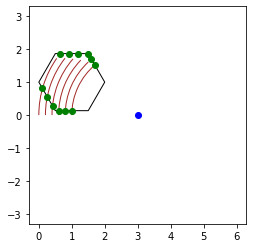

In [70]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid([0,1,2], [0,1,2])
#plt.plot(xx, yy, 'ko')

h = Hex(1,1,1)
h.render(fill=None)
verts = h.get_verts()

center = (3,0)

plt.plot(3, 0, 'bo')


for step in np.linspace(0,1,6):
    dia = 4 + step*2
    theta1 = 130 + step*15
    ar = Arc(center, dia, dia, theta1=theta1, theta2=180, color='brown')
    ax.add_patch(ar)
    
    for v in range(6):
        interpt = circle_line_segment_intersection(center, circle_radius=dia/2, 
                                                   pt1=verts[v], 
                                                   pt2=verts[(v+1)%6], full_line=False)
        if interpt:
            plt.plot(*interpt[0], 'go')
    
plt.axis('scaled');
#plt.axis('equal');

## Next: Find the angle (slope) formed by the line connecting Center and Intersection Point

The center is the blue point. There are 2 Green points which lie ON the Hexagon border, for any circle drawn from Center.
We need the ANGLE that each green point forms, wrt Center. (See Image below)

0 [(1.6999021532019363, 1.5197847178962678)]
4 [(1.0044923433950754, 0.13397459621556146)]


(-0.15000000000000002, 3.15, -0.09330127018922195, 1.9593266739736608)

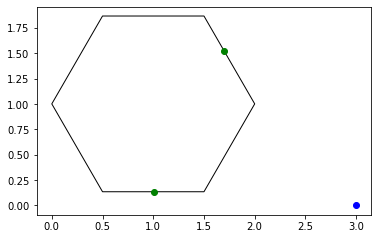

In [85]:
h.render(fill=None)
plt.axis('scaled')

circle_center = (3,0)
verts = h.get_verts()
i2 = []
for v in range(6):
    interpt = circle_line_segment_intersection(circle_center, circle_radius=2, 
                                               pt1=verts[v], 
                                               pt2=verts[(v+1)%6], full_line=False)
    if interpt:
        print(v, interpt)
        plt.plot(*interpt[0], 'go')
        i2.append(interpt[0])
        
plt.plot(3,0, 'bo')
plt.axis('scaled')

In [110]:
slope(i2[0], center), degree_slope(i2[0], center)
slope(i2[1], center), degree_slope(i2[1], center)

(-0.06713810181189701, -3.840965716258134)

0 [(1.6999021532019363, 1.5197847178962678)]
4 [(1.0044923433950754, 0.13397459621556146)]


(-0.25, 5.25, -2.2, 2.2)

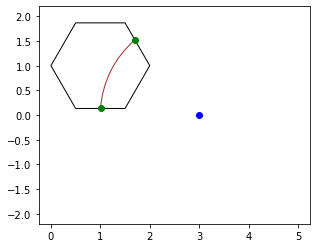

In [116]:
fig, ax = plt.subplots()

h.render(fill=None)
plt.axis('scaled')

circle_center = (3,0)
verts = h.get_verts()
i2 = []

circle_radius = 2
for v in range(6):
    interpt = circle_line_segment_intersection(circle_center, circle_radius, 
                                               pt1=verts[v], 
                                               pt2=verts[(v+1)%6], full_line=False)
    if interpt:
        print(v, interpt)
        plt.plot(*interpt[0], 'go')
        i2.append(interpt[0])
        
plt.plot(3,0, 'bo')

#Try and plot the arc from INSIDE the hexagon
theta1 = degree_slope(i2[0], center) + 180
theta2 = degree_slope(i2[1], center) + 180

ar = Arc(circle_center, 2*circle_radius, 2*circle_radius , theta1=theta1, theta2=theta2, color='brown')
ax.add_patch(ar)



plt.axis('scaled')

Beautiful! This is what we wanted. Now, we have to ensure that it works for multiple different radii.
Then make it a callable function. Given a Center and a Hexagon, plot specified number of inner arcs.

In [25]:
from math import sqrt
def distance(pt1, pt2):
    return sqrt( (pt2[0] - pt1[0])**2 + (pt2[1]- pt1[1])**2 )

(-0.595, 12.495, -8.489999999999997, 4.4899999999999975)

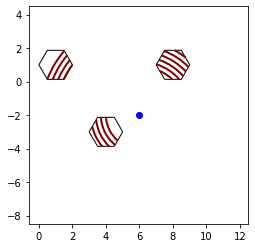

In [34]:
            
fig, ax = plt.subplots()
  
h1 = Hex(1,1,1)
h1.render(fill=None)
h2 = Hex(8,1,1)
h2.render(fill=None)
h3 = Hex(4,-3,1)
h3.render(fill=None)

DEBUG = True
circle_center = (6,-2)
if DEBUG:
    plt.plot(*circle_center, 'bo')

hlist = [h1, h2, h3]    
for h in hlist:
    hex_cookie_cutter(h, circle_center, min_dist=2, max_dist=6.1, step=0.3, color='maroon', lw=2)
plt.axis('scaled')

Now, there is one more problem that needs to be addressed. As is visible, some hexagons are NOT getting filled with Arcs. This has to do with the min and max_distances from the Center.

Possible Solution Idea:
1. compute Distance from center of any hexagon to the circle_center.
2. Then based on the `step-size` add and subtract a smaller distance to make it work.

This means that we first need a distance calculating function...

dist 5.830951894845301 (1, 1) 3 7
dist 3.605551275463989 (8, 1) 1 5
dist 2.23606797749979 (4, -3) 0 4


(-1.2599999999999976,
 13.259999999999998,
 -9.259999999999998,
 5.259999999999998)

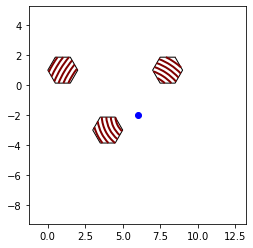

In [35]:
            
fig, ax = plt.subplots()
  
h1 = Hex(1,1,1)
h1.render(fill=None)
h2 = Hex(8,1,1)
h2.render(fill=None)
h3 = Hex(4,-3,1)
h3.render(fill=None)

DEBUG = True
circle_center = (6,-2)
if DEBUG:
    plt.plot(*circle_center, 'bo')

hlist = [h1, h2, h3]    
for h in hlist:
    dist = distance(circle_center, h.center)
    min_dist = int(dist) - 2
    max_dist = int(dist) + 2
    print(f'dist {dist} {h.center} {min_dist} {max_dist}')
    hex_cookie_cutter(h, circle_center, min_dist, max_dist, step=0.3, color='maroon', lw=2)
plt.axis('scaled')

(-8.799999999999997, 8.799999999999997, -8.799999999999997, 8.799999999999997)

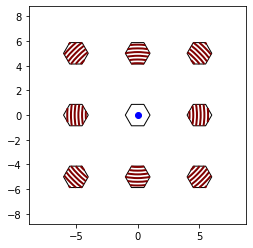

In [82]:
            
fig, ax = plt.subplots()
  

hexes = []
for x in [-5, 0, 5]:
    for y in [-5, 0, 5]:    
        h1 = Hex(x,y,1)
        h1.render(fill=None)
        hexes.append(h1)

DEBUG = True
circle_center = (0, 0)
if DEBUG:
    plt.plot(*circle_center, 'bo')

for h in hexes:
    dist = distance(circle_center, h.center)
    min_dist = int(dist) - 2
    max_dist = int(dist) + 2
    #print(f'dist {dist} {h.center} {min_dist} {max_dist}')
    hex_cookie_cutter(h, circle_center, min_dist, max_dist, step=0.3, color='maroon', lw=2)
plt.axis('scaled')

## Ready for HexGrid and Main()

In [88]:
def hex_cookie_cutter(h, circle_center, min_dist=3, max_dist=6, step=0.3, ax=None, **kwargs):

    verts = h.get_verts()
    
    if ax is None:
        ax = plt.gca()


    for circle_radius in np.arange(min_dist, max_dist, step):
        i2 = []
        for v in range(6):
            interpt = circle_line_segment_intersection(circle_center, circle_radius, 
                                                       pt1=verts[v], 
                                                       pt2=verts[(v+1)%6], 
                                                       full_line=False)
            if interpt:
                #print(v, interpt)
                #plt.plot(*interpt[0], 'go')
                i2.append(interpt[0])

        if len(i2)==2: #Draw only if the hexagon is intersected twice by the Circle
            theta1 = degree_slope(i2[0], circle_center) + 180
            theta2 = degree_slope(i2[1], circle_center) + 180
            #print(f'diff 1 {theta1-theta2}, diff2 {theta2-theta1}')
            #print(f'Th1 {theta1} theta2 {theta2}, {circle_radius}')
            condition1 = (theta2 - theta1) > 180
            condition2 = theta1 > theta2
            
            if condition1 or condition2: # flip the two thetas
                theta1, theta2 = theta2, theta1
            ar = Arc(circle_center, 2*circle_radius, 2*circle_radius , theta1=theta1, theta2=theta2, 
                     **kwargs)
            ax.add_patch(ar)

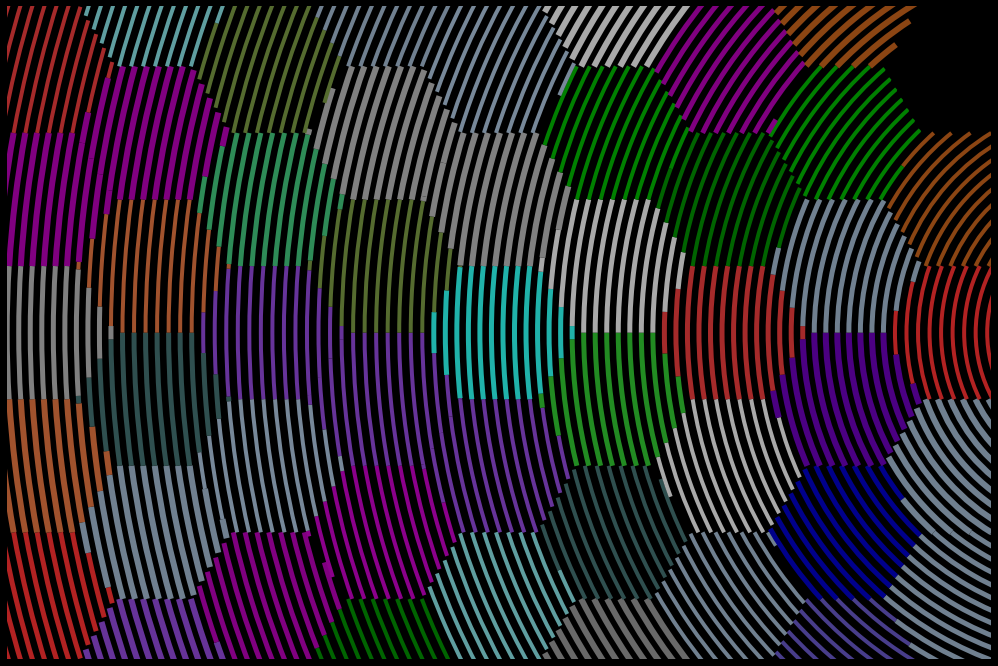

In [111]:
def main():
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    
    nbk = 17
    
    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = 'k'
    fig.patch.set_facecolor(bg_color)

    size=2
    num_rows, num_cols = 14, 8
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    
    
    possible_centers = [(16,0), (-12,-10), (12,-10), (-16,0), (16, 10)]
    
    DEBUG = False
    circle_center = (16, 0)
    if DEBUG:
        plt.plot(*circle_center, 'bo')

    for h in hg.hlist:
        
        dist = distance(circle_center, h.center)
        min_dist = max(0, int(dist) - 4)
        max_dist = int(dist) + 3
        clr = get_random_color_from_family(LOW_V)
        hex_cookie_cutter(h, circle_center, min_dist, max_dist, step=0.3, ax=ax, color=clr, 
                          lw=np.random.choice([4,5,6])
                         )

        
    plt.axis('scaled')
    xclip, yclip = 0.8, 0.7
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip
    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    
    pf.save_file(fig, 
              f'Arcs_inside_hexagons_',
              nbk = nbk,
              num_rows=num_rows, 
              num_cols=num_cols
            )

    
    logging.info('Finished')

if __name__ == '__main__':
    main()


In [56]:
size=2
num_rows, num_cols = 14, 8
hg = HexGrid(num_rows, num_cols, size, flat=True)

hg.hlist[52].center

(6.0, 0.0)